### Create an ipython notebook to provide a tutorial showing the steps to use a clustering algorithm from one of the following:
http://scikit-learn.org/stable/modules/clustering.html

or 

asscociation rules algorithm from:

https://github.com/asaini/Apriori

or

http://aimotion.blogspot.com/2013/01/machine-learning-and-data-mining.html

Your tutorial will  include

1. a short description of what the algorithm is used for ( and of the code to be used )

2, Data setup

3. Algorithm run

4. Display in graph and plots

5. Discussion of the images in the graphs and plots

6. Bibliography ( urls and names of pages and authors of used code and descriptions )  Be sure to put in 

  You should submit your ipython notebook url in your github account. 

Be sure that if someone downloads your directory the notebook will run as shown.  So any scripts or images used in the notebook

are local to the directory of the notebook.  You must have citations and references marked in the text.  You can use http://www.citationmachine.net  to help standardize your references at the end of you document

For extra credit create another notebook and  do one of the other association/cluster tutorials or a different analysis tutorial of the same data.



### I have implemented the Apriori algorithm from the below reference:
http://adataanalyst.com/machine-learning/apriori-algorithm-python-3-0/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Mapped all the column values to some categories

In [2]:
df.loc[df['BMI'] < 18.5, 'BMI'] = 'Low BMI'
df.loc[(df['BMI'] > 18.5) & (df['BMI'] < 25), 'BMI'] = 'Normal BMI'
df.loc[(df['BMI'] > 25) & (df['BMI'] < 30), 'BMI'] = 'Overweight'
df.loc[(df['BMI'] > 30) & (df['BMI'] < 100), 'BMI'] = 'High BMI'
#df['BMI'].head()

In [3]:
df.loc[(df['Age'] >= 20) & (df['Age'] < 30), 'Age'] = 'Age 20-30'
df.loc[(df['Age'] >= 30) & (df['Age'] < 40), 'Age'] = 'Age 30-40'
df.loc[(df['Age'] >= 40) & (df['Age'] < 50), 'Age'] = 'Age 40-50'
df.loc[(df['Age'] >= 50) & (df['Age'] < 60), 'Age'] = 'Age 50-60'
df.loc[(df['Age'] >= 60) & (df['Age'] < 70), 'Age'] = 'Age 60-70'
df.loc[(df['Age'] >= 70) & (df['Age'] < 80), 'Age'] = 'Age 70-80'
df.loc[(df['Age'] >= 80) & (df['Age'] < 100), 'Age'] = 'Age Above 80'
#df['Age'].head()

In [4]:
df.loc[(df['DiabetesPedigreeFunction'] >= 0) & (df['DiabetesPedigreeFunction'] < 0.8), 'DiabetesPedigreeFunction'] = 'pedi below 0.8'
df.loc[(df['DiabetesPedigreeFunction'] >= 0.8) & (df['DiabetesPedigreeFunction'] < 1.6), 'DiabetesPedigreeFunction'] = 'pedi 0.8-1.6'
df.loc[(df['DiabetesPedigreeFunction'] >= 1.6) & (df['DiabetesPedigreeFunction'] < 2.5), 'DiabetesPedigreeFunction'] = 'pedi above 1.6'

In [5]:
df.loc[(df['Insulin'] >= 0) & (df['Insulin'] < 16), 'Insulin'] = 'Low insulin'
df.loc[(df['Insulin'] >= 16) & (df['Insulin'] < 167), 'Insulin'] = 'Normal insulin'
df.loc[(df['Insulin'] >= 167) & (df['Insulin'] < 10000), 'Insulin'] = 'High insulin'

In [6]:
df.loc[(df['SkinThickness'] >= 0) & (df['SkinThickness'] <= 30), 'SkinThickness'] = 'Normal skin thickness'
df.loc[(df['SkinThickness'] > 30) & (df['SkinThickness'] < 100), 'SkinThickness'] = 'Abnormal skin thickness'

In [7]:
df.loc[(df['BloodPressure'] >= 0) & (df['BloodPressure'] < 60), 'BloodPressure'] = 'Low BP'
df.loc[(df['BloodPressure'] >= 60) & (df['BloodPressure'] < 80), 'BloodPressure'] = 'Normal BP'
df.loc[(df['BloodPressure'] >= 80) & (df['BloodPressure'] < 90), 'BloodPressure'] = 'Prehypertension'
df.loc[(df['BloodPressure'] >= 90) & (df['BloodPressure'] < 140), 'BloodPressure'] = 'High BP'

In [8]:
df.loc[(df['Glucose'] >= 0) & (df['Glucose'] <= 140), 'Glucose'] = 'Normal Glucose'
df.loc[(df['Glucose'] > 140) & (df['Glucose'] <= 200), 'Glucose'] = 'High Glucose'

In [9]:
df.loc[df['Outcome'] == 0, 'Outcome'] = 'Not diabetic'
df.loc[df['Outcome'] == 1, 'Outcome'] = 'Diabetic'

We find the frequent item sets using the Apriori algorithm . The Apriori algorithm takes a dataset and a minimum support level as input and will generate a list of all itemsets with one item. The transaction data will be then scanned to see which sets meet the minimum support level. Sets that don’t meet the minimum support level will be removed. The remaining sets will then be combined to make itemsets with two elements. Again, the transaction dataset will be scanned and itemsets not meeting the minimum support level will be removed. This procedure will be repeated until all sets are tossed out. Here we take support of 0.3

In [25]:
def load_dataset():
    "Load the sample dataset."
    return df.values.tolist()


def createC1(dataset):
    "Create a list of candidate item sets of size one."
    c1 = []
    for transaction in dataset:
        for item in transaction:
            if not [item] in c1:
                c1.append([item])
    c1.sort()
    #frozenset because it will be a ket of a dictionary.
    return map(frozenset, c1)


def scanD(dataset, candidates, min_support):
    "Returns all candidates that meets a minimum support level"
    sscnt = {}
    for tid in dataset:
        for can in candidates:
            if can.issubset(tid):
                sscnt.setdefault(can, 0)
                sscnt[can] += 1

    num_items = float(len(dataset))
    retlist = []
    support_data = {}
    for key in sscnt:
        support = sscnt[key] / num_items
        if support >= min_support:
            retlist.insert(0, key)
        support_data[key] = support
    return retlist, support_data


def aprioriGen(freq_sets, k):
    "Generate the joint transactions from candidate sets"
    retList = []
    lenLk = len(freq_sets)
    for i in range(lenLk):
        for j in range(i + 1, lenLk):
            L1 = list(freq_sets[i])[:k - 2]
            L2 = list(freq_sets[j])[:k - 2]
            L1.sort()
            L2.sort()
            if L1 == L2:
                retList.append(freq_sets[i] | freq_sets[j])
    return retList


def apriori(dataset, minsupport=0.2):
    "Generate a list of candidate item sets"
    C1 = createC1(dataset)
    D = map(set, dataset)
    L1, support_data = scanD(D, C1, minsupport)
    L = [L1]
    k = 2
    while (len(L[k - 2]) > 0):
        Ck = aprioriGen(L[k - 2], k)
        Lk, supK = scanD(D, Ck, minsupport)
        support_data.update(supK)
        L.append(Lk)
        k += 1

    return L, support_data

In [26]:
dataset = load_dataset()

In [27]:
C1 = createC1(dataset)

In [28]:
#D is a dataset in the setform.

D = list(map(set,dataset))

In [29]:
L1,suppDat0 = scanD(D,C1,0.2)

In [30]:
L1

[frozenset({'Normal skin thickness'}),
 frozenset({'Normal Glucose'}),
 frozenset({'Not diabetic'}),
 frozenset({'High Glucose'}),
 frozenset({'Low insulin'}),
 frozenset({'Normal insulin'}),
 frozenset({'Age 20-30'}),
 frozenset({'High BMI'}),
 frozenset({'Abnormal skin thickness'}),
 frozenset({'pedi below 0.8'}),
 frozenset({'Normal BP'}),
 frozenset({'Overweight'}),
 frozenset({'Diabetic'}),
 frozenset({'Age 30-40'})]

In [31]:
L,suppData = apriori(dataset)

In [32]:
L

[[frozenset({'Normal skin thickness'}),
  frozenset({'Normal Glucose'}),
  frozenset({'Not diabetic'}),
  frozenset({'High Glucose'}),
  frozenset({'Low insulin'}),
  frozenset({'Normal insulin'}),
  frozenset({'Age 20-30'}),
  frozenset({'High BMI'}),
  frozenset({'Abnormal skin thickness'}),
  frozenset({'pedi below 0.8'}),
  frozenset({'Normal BP'}),
  frozenset({'Overweight'}),
  frozenset({'Diabetic'}),
  frozenset({'Age 30-40'})],
 [frozenset({'Normal Glucose', 'Not diabetic'}),
  frozenset({'Not diabetic', 'pedi below 0.8'}),
  frozenset({'Diabetic', 'pedi below 0.8'}),
  frozenset({'High Glucose', 'pedi below 0.8'}),
  frozenset({'Abnormal skin thickness', 'High BMI'}),
  frozenset({'Age 20-30', 'pedi below 0.8'}),
  frozenset({'Age 20-30', 'Normal Glucose'}),
  frozenset({'Normal skin thickness', 'pedi below 0.8'}),
  frozenset({'Age 20-30', 'High BMI'}),
  frozenset({'Normal Glucose', 'pedi below 0.8'}),
  frozenset({'High BMI', 'Normal BP'}),
  frozenset({'Age 20-30', 'Low i

In [33]:
aprioriGen(L[0],2)

[frozenset({'Normal Glucose', 'Normal skin thickness'}),
 frozenset({'Normal skin thickness', 'Not diabetic'}),
 frozenset({'High Glucose', 'Normal skin thickness'}),
 frozenset({'Low insulin', 'Normal skin thickness'}),
 frozenset({'Normal insulin', 'Normal skin thickness'}),
 frozenset({'Age 20-30', 'Normal skin thickness'}),
 frozenset({'High BMI', 'Normal skin thickness'}),
 frozenset({'Abnormal skin thickness', 'Normal skin thickness'}),
 frozenset({'Normal skin thickness', 'pedi below 0.8'}),
 frozenset({'Normal BP', 'Normal skin thickness'}),
 frozenset({'Normal skin thickness', 'Overweight'}),
 frozenset({'Diabetic', 'Normal skin thickness'}),
 frozenset({'Age 30-40', 'Normal skin thickness'}),
 frozenset({'Normal Glucose', 'Not diabetic'}),
 frozenset({'High Glucose', 'Normal Glucose'}),
 frozenset({'Low insulin', 'Normal Glucose'}),
 frozenset({'Normal Glucose', 'Normal insulin'}),
 frozenset({'Age 20-30', 'Normal Glucose'}),
 frozenset({'High BMI', 'Normal Glucose'}),
 froze

To find association rules, we start with a frequent itemset. 
The generateRules() function takes three inputs: a list of frequent itemsets, a dictionary of support data for those itemsets, and a minimum confidence threshold. It’s going to generate a list of rules with confidence values that we can sort 

In [34]:
def generateRules(L, supportData, minConf=0.2):  #supportData is a dict coming from scanD
    bigRuleList = []
    for i in range(1, len(L)):#only get the sets with two or more items
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]
            if (i > 1):
                rulesFromConseq(freqSet, H1, supportData, bigRuleList, minConf)
            else:
                calcConf(freqSet, H1, supportData, bigRuleList, minConf)
    return bigRuleList   

In [35]:
def calcConf(freqSet, H, supportData, brl, minConf=0.2):
    prunedH = [] #create new list to return
    for conseq in H:
        conf = supportData[freqSet]/supportData[freqSet-conseq] #calc confidence
        if conf >= minConf: 
            print (freqSet-conseq,'-->',conseq,'conf:',conf)
            brl.append((freqSet-conseq, conseq, conf))
            prunedH.append(conseq)
    return prunedH

In [36]:
def rulesFromConseq(freqSet, H, supportData, brl, minConf=0.2):
    m = len(H[0])
    if (len(freqSet) > (m + 1)): #try further merging
        Hmp1 = aprioriGen(H, m+1)#create Hm+1 new candidates
        Hmp1 = calcConf(freqSet, Hmp1, supportData, brl, minConf)
        if (len(Hmp1) > 1):    #need at least two sets to merge
            rulesFromConseq(freqSet, Hmp1, supportData, brl, minConf)

Taken minimum confidence 0.2 to show maximum possible association rules for as many parameters as possible

In [37]:
rules= generateRules(L,suppData, minConf=0.2)

(frozenset(['Normal Glucose']), '-->', frozenset(['Not diabetic']), 'conf:', 0.7638888888888888)
(frozenset(['Not diabetic']), '-->', frozenset(['Normal Glucose']), 'conf:', 0.88)
(frozenset(['pedi below 0.8']), '-->', frozenset(['Not diabetic']), 'conf:', 0.6772247360482654)
(frozenset(['Not diabetic']), '-->', frozenset(['pedi below 0.8']), 'conf:', 0.898)
(frozenset(['pedi below 0.8']), '-->', frozenset(['Diabetic']), 'conf:', 0.3227752639517345)
(frozenset(['Diabetic']), '-->', frozenset(['pedi below 0.8']), 'conf:', 0.7985074626865671)
(frozenset(['pedi below 0.8']), '-->', frozenset(['High Glucose']), 'conf:', 0.2398190045248869)
(frozenset(['High Glucose']), '-->', frozenset(['pedi below 0.8']), 'conf:', 0.828125)
(frozenset(['High BMI']), '-->', frozenset(['Abnormal skin thickness']), 'conf:', 0.45376344086021503)
(frozenset(['Abnormal skin thickness']), '-->', frozenset(['High BMI']), 'conf:', 0.8865546218487395)
(frozenset(['pedi below 0.8']), '-->', frozenset(['Age 20-30']),

In [38]:
len(rules)

542

With the rules generated, plotted a graph representation to see the relation between various parameters in diabetes conditions

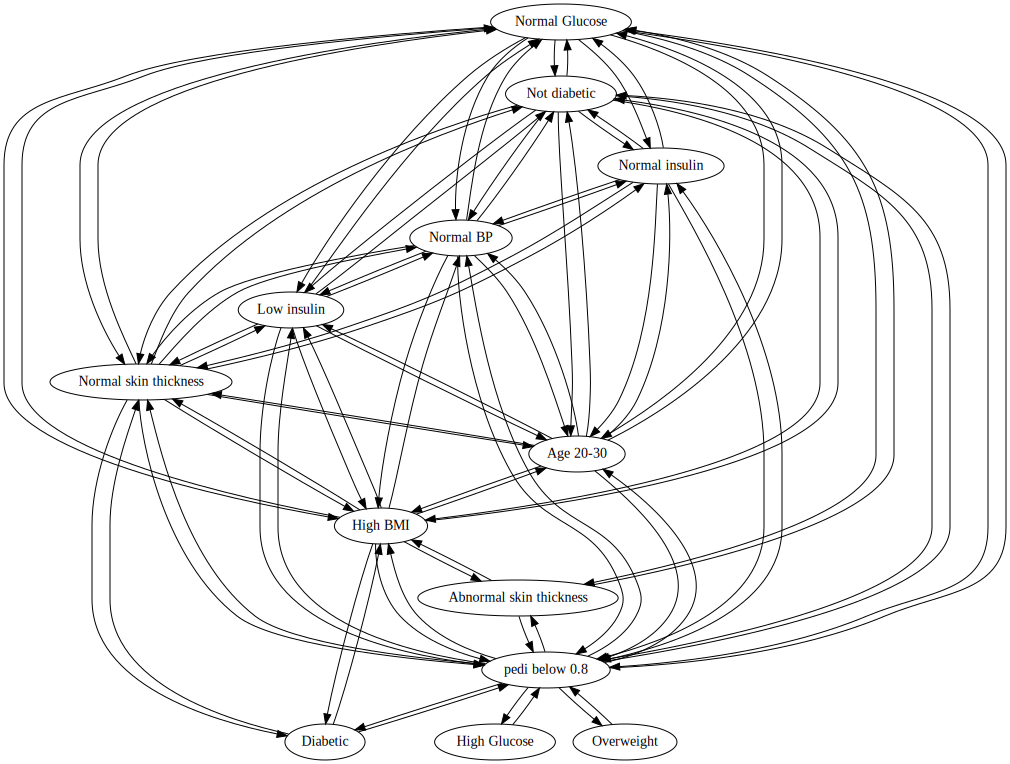

In [39]:
from graphviz import Digraph
dot = Digraph(strict=True, comment='The Connectivity')
xvalues = []
yvalues = []
plotdict = []
for i in range(len(rules)):
    for k in list(rules[i][0]):        
        for v in list(rules[i][1]):
            dot.edge(k,v)
#print plotdict
dot